In [1]:
import xarray as xr
import numpy as np

In [2]:
ds_tsg = xr.open_dataset("../data/obs/ts_gridded_200404_2022215.nc")
ds_tsg = ds_tsg.rename({"depth": "z"})
ds_tsg = ds_tsg.assign_coords(z=-abs(ds_tsg.pressure))
ds_tsg = ds_tsg.set_coords(["pressure", ])
ds_tsg.z.attrs["units"] = "m"
ds_tsg.z.attrs["long_name"] = "vertical position"
ds_tsg

<xarray.Dataset> Size: 455MB
Dimensions:          (time: 13057, z: 242)
Coordinates:
  * time             (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    pressure         (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z                (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
Data variables: (12/18)
    TG_west          (z, time) float64 25MB ...
    SG_west          (z, time) float64 25MB ...
    TG_wb3           (z, time) float64 25MB ...
    SG_wb3           (z, time) float64 25MB ...
    TG_east          (z, time) float64 25MB ...
    SG_east          (z, time) float64 25MB ...
    ...               ...
    TG_east_flag     (z, time) float64 25MB ...
    SG_east_flag     (z, time) float64 25MB ...
    TG_marwest_flag  (z, time) float64 25MB ...
    SG_marwest_flag  (z, time) float64 25MB ...
    TG_mareast_flag  (z, time) float64 25MB ...
    SG_mareast_flag  (z, time) float64 25MB ...
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...

In [3]:
_TG = ds_tsg[["TG_west", "TG_wb3", "TG_marwest", "TG_mareast", "TG_east"]].to_array("pos")
_TG = _TG.assign_coords(pos=range(5))
_TG = _TG.assign_coords(name=(("pos", ), ["west", "wb3", "marwest", "mareast", "east"]))
_TG = _TG.assign_coords(lon=(("pos", ), [-76.74, -76.50, -50.57, -41.21, -16.23,]))
_TG = _TG.assign_coords(lat=(("pos", ), [26.52, 26.50, 24.52, 24.52, 26.99, ]))
_TG = _TG.rename("temperature")
_TG.attrs["long_name"] = "Temperature"
_TG.attrs["units"] = "degC"

_SG = ds_tsg[["SG_west", "SG_wb3", "SG_marwest", "SG_mareast", "SG_east"]].to_array("pos")
_SG = _SG.assign_coords(pos=range(5))
_SG = _SG.assign_coords(name=(("pos", ), ["west", "wb3", "marwest", "mareast", "east"]))
_SG = _SG.assign_coords(lon=(("pos", ), [-76.74, -76.50, -50.57, -41.21, -16.23,]))
_SG = _SG.assign_coords(lat=(("pos", ), [26.52, 26.50, 24.52, 24.52, 26.99, ]))
_SG = _SG.rename("salinity")
_SG.attrs["long_name"] = "Salinity"
_SG.attrs["units"] = "psu"

ds_pos = xr.merge([_TG, _SG])
ds_pos

<xarray.Dataset> Size: 253MB
Dimensions:      (time: 13057, z: 242, pos: 5)
Coordinates:
  * time         (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
  * pos          (pos) int64 40B 0 1 2 3 4
    name         (pos) <U7 140B 'west' 'wb3' 'marwest' 'mareast' 'east'
    lon          (pos) float64 40B -76.74 -76.5 -50.57 -41.21 -16.23
    lat          (pos) float64 40B 26.52 26.5 24.52 24.52 26.99
Data variables:
    temperature  (pos, z, time) float64 126MB nan nan nan ... 2.405 2.405 2.405
    salinity     (pos, z, time) float64 126MB nan nan nan ... 34.89 34.89 34.89
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...
    long_name:                     Temperature
    units:                         degC

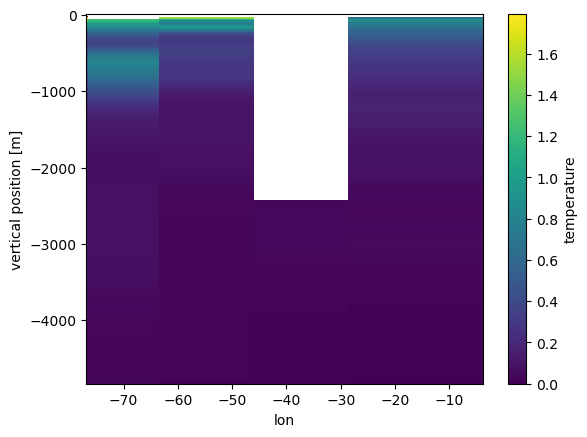

In [4]:
ds_pos.temperature.std("time").plot(x="lon", y="z")

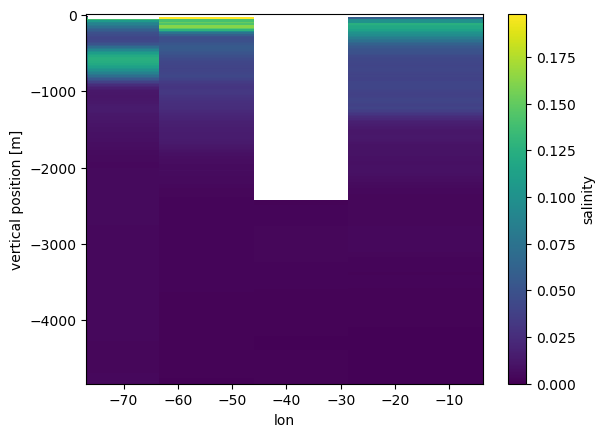

In [5]:
ds_pos.salinity.std("time").plot(x="lon", y="z")

In [6]:
import gsw

In [7]:
gsw.conversions.CT_from_pt?

Signature: gsw.conversions.CT_from_pt(SA, pt)
Docstring:
Calculates Conservative Temperature of seawater from potential
temperature (whose reference sea pressure is zero dbar).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
pt : array-like
    Potential temperature referenced to a sea pressure, degrees C

Returns
-------
CT : array-like, deg C
    Conservative Temperature (ITS-90)
File:      ~/micromamba/envs/rapid_geostrophic/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [16]:
gsw.density.rho?

Signature: gsw.density.rho(SA, CT, p)
Docstring:
Calculates in-situ density from Absolute Salinity and Conservative
Temperature, using the computationally-efficient expression for
specific volume in terms of SA, CT and p  (Roquet et al., 2015).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
CT : array-like
    Conservative Temperature (ITS-90), degrees C
p : array-like
    Sea pressure (absolute pressure minus 10.1325 dbar), dbar

Returns
-------
rho : array-like, kg/m
    in-situ density
File:      ~/micromamba/envs/rapid_geostrophic/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [8]:
ds_pos["ct"] = gsw.conversions.CT_from_pt(ds_pos.salinity, ds_pos.temperature)
ds_pos["ct"].attrs["long_name"] = "Conservative Temperature"
ds_pos["ct"].attrs["units"] = "degC"

ds_pos["rho"] = gsw.density.rho(ds_pos.salinity, ds_pos.ct, ds_pos.pressure)
ds_pos["rho"].attrs["long_name"] = "Density"
ds_pos["rho"].attrs["units"] = "kg/m3"

ds_pos

<xarray.Dataset> Size: 506MB
Dimensions:      (time: 13057, z: 242, pos: 5)
Coordinates:
  * time         (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
    pressure     (z) float64 2kB 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z            (z) float64 2kB -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
  * pos          (pos) int64 40B 0 1 2 3 4
    name         (pos) <U7 140B 'west' 'wb3' 'marwest' 'mareast' 'east'
    lon          (pos) float64 40B -76.74 -76.5 -50.57 -41.21 -16.23
    lat          (pos) float64 40B 26.52 26.5 24.52 24.52 26.99
Data variables:
    temperature  (pos, z, time) float64 126MB nan nan nan ... 2.405 2.405 2.405
    salinity     (pos, z, time) float64 126MB nan nan nan ... 34.89 34.89 34.89
    ct           (pos, z, time) float64 126MB nan nan nan ... 2.404 2.404 2.404
    rho          (pos, z, time) float64 126MB nan nan ... 1.049e+03 1.049e+03
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...
    long_name:                     Temperature
    units:                         degC

# thermal wind

$$\frac{\partial v}{\partial z} = - \frac{g}{\rho_0\,f} \frac{\partial\rho}{\partial x}$$
$$V|_{X,Z} = \int_X{\rm d}x\int_Z{\rm d}z\int_Z{\rm d}z \frac{\partial v}{\partial z}$$
$$\int_X{\rm d}x = x_1 - x_0$$
$$\frac{\partial\rho}{\partial x} \approx \frac{\rho(x_1)-\rho(x_0)}{x_1 - x_0}$$
$$V|_{X,Z} = -\frac{g}{\rho_0\,f} \int_Z{\rm d}z\,  \int_Z{\rm d}z\, (\rho(x_1) - \rho(x_0))$$

In [9]:
g = 9.81
f = 2 * 7.292116E-5 * np.sin(np.deg2rad(26.5))
rho0 = 1025.0

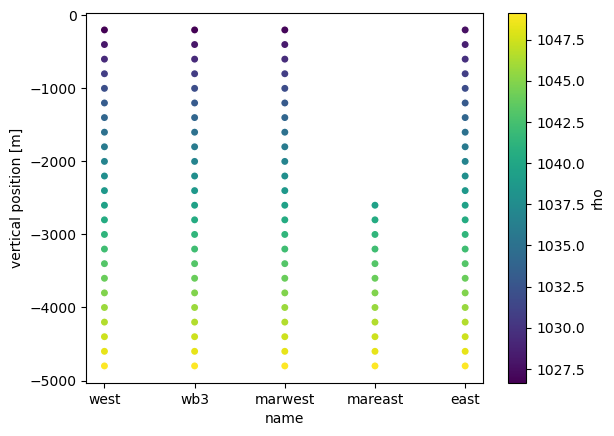

In [10]:
ds_pos.isel(z=slice(None, None, 10)).mean("time").plot.scatter(x="name", y="z", hue="rho")

In [11]:
pos_pairs_depth_range = [
    (("west", "east"), (None, -3700)),
    (("west", "marwest"), (-3700, None)),
    (("mareast", "east"), (-3700, None)),
]

In [79]:
rho_n1 = xr.concat(
    [
        (
            # ds_pos.sel(pos=ds_pos.name == n1).squeeze(drop=True).sel(z=slice(z0, z1)).rho
            - ds_pos.sel(pos=ds_pos.name == n0).squeeze(drop=True).sel(z=slice(z0, z1)).rho
        ).assign_coords(box="_".join((n0, n1)))
        for ((n0, n1), (z0, z1)) in pos_pairs_depth_range
    ],
    dim="box"
)
rho_n1

<xarray.DataArray 'rho' (box: 3, z: 242, time: 13057)> Size: 76MB
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-1049.17996923, -1049.18000709, -1049.18004495, ...,
         -1049.17604964, -1049.17718852, -1049.17655612],
        [-1049.09636641, -1049.09708574, -1049.09782124, ...,
         -1049.09068122, -1049.09251886, -1049.09233617],
        [-1049.0127227 , -1049.01344895, -1049.01420944, ...,
         -1049.00528411, -1049.00781609, -1049.00807968],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-1049.15073229, -1049.15085583, -1049.15092483, ...,
                    nan,            nan,            nan],
        [-1049.0669845 , -1049.06711223, -1049.0671848 , ...,
                    nan,            nan,            nan],
        [-1048.983039  , -1048.98316308, -1048.98323678, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * time      (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
  * z         (z) float64 2kB -4.82e+03 -4.8e+03 -4.78e+03 ... -40.0 -20.0 -0.0
    pressure  (box, z) float64 6kB nan nan nan nan nan ... nan nan nan nan nan
  * box       (box) <U12 144B 'west_east' 'west_marwest' 'mareast_east'
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...
    long_name:                     Density
    units:                         kg/m3

In [12]:
rho_diff = xr.concat(
    [
        (
            ds_pos.sel(pos=ds_pos.name == n1).squeeze(drop=True).sel(z=slice(z0, z1)).rho
            - ds_pos.sel(pos=ds_pos.name == n0).squeeze(drop=True).sel(z=slice(z0, z1)).rho
        ).assign_coords(box="_".join((n0, n1)))
        for ((n0, n1), (z0, z1)) in pos_pairs_depth_range
    ],
    dim="box"
)
rho_diff

<xarray.DataArray 'rho' (box: 3, z: 242, time: 13057)> Size: 76MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.00903196, 0.00910656, 0.00918602, ...,        nan,
                nan,        nan],
        [0.00826412, 0.00765565, 0.00703799, ...,        nan,
                nan,        nan],
        [0.00750051, 0.00688352, 0.00624143, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.0034283 , 0.00333126, 0.00328006, ...,        nan,
                nan,        nan],
        [0.00350235, 0.00340236, 0.00335103, ...,        nan,
                nan,        nan],
        [0.00373322, 0.00363812, 0.0035891 , ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time      (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
  * z         (z) float64 2kB -4.82e+03 -4.8e+03 -4.78e+03 ... -40.0 -20.0 -0.0
    pressure  (box, z) float64 6kB nan nan nan nan nan ... nan nan nan nan nan
  * box       (box) <U12 144B 'west_east' 'west_marwest' 'mareast_east'

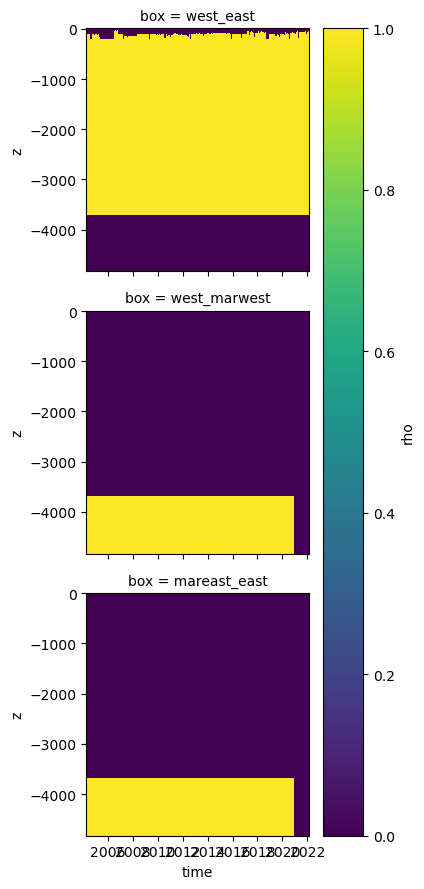

In [13]:
(~rho_diff.isnull()).plot(col="box", col_wrap=1)

In [80]:
dv_dz = (- rho_diff * g / f / rho0).sum("box").where(
    (~(- rho_diff * g / f / rho0).isnull()).sum("box") > 0
).rename("dv_dz_times_X")
dv_dz

<xarray.DataArray 'dv_dz_times_X' (z: 242, time: 13057)> Size: 25MB
array([[-1.83257262, -1.82927258, -1.83342777, ...,         nan,
                nan,         nan],
       [-1.7305351 , -1.62633913, -1.52794832, ...,         nan,
                nan,         nan],
       [-1.65218269, -1.547453  , -1.44580971, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * time     (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
  * z        (z) float64 2kB -4.82e+03 -4.8e+03 -4.78e+03 ... -40.0 -20.0 -0.0

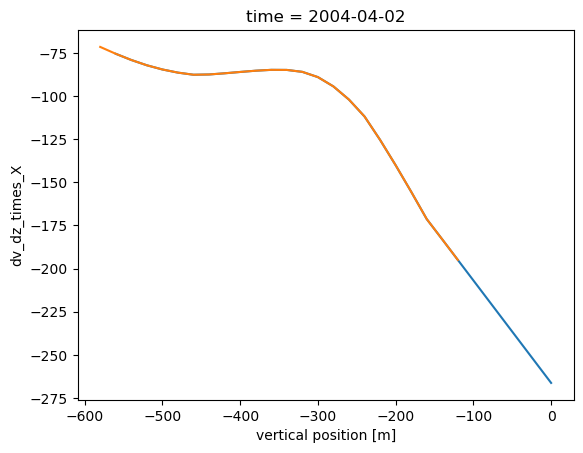

In [93]:
_dv_dz = dv_dz.isel(time=0, z=slice(-30, None))
(_dv_dz.isel(z=0) + _dv_dz.diff("z").ffill("z").cumsum("z")).plot()
_dv_dz.plot()

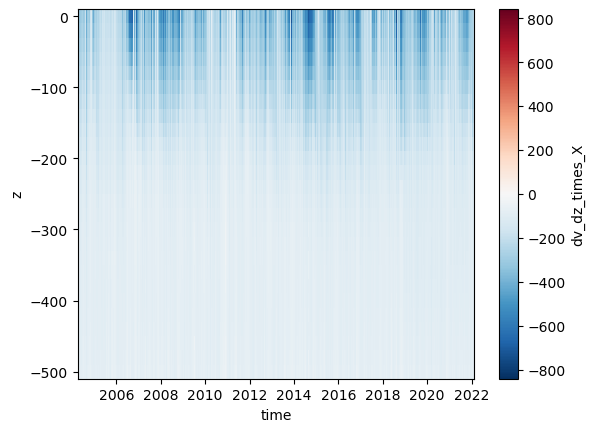

In [109]:
_dv_dz = dv_dz.isel(z=slice(-40, None))
dv_dz_fillup = xr.where(
    ~dv_dz.isnull(),
    dv_dz,
    (_dv_dz.isel(z=0) + _dv_dz.diff("z").ffill("z").cumsum("z")).interp(z=dv_dz.z)
)
dv_dz_fillup.sel(z=slice(-500, 0)).plot()

In [144]:
zref = xr.DataArray(np.linspace(-5000, -4000, 4), dims=("zref", ))
zref = zref.assign_coords(zref=zref)
zref

<xarray.DataArray (zref: 4)> Size: 32B
array([-5000.        , -4666.66666667, -4333.33333333, -4000.        ])
Coordinates:
  * zref     (zref) float64 32B -5e+03 -4.667e+03 -4.333e+03 -4e+03

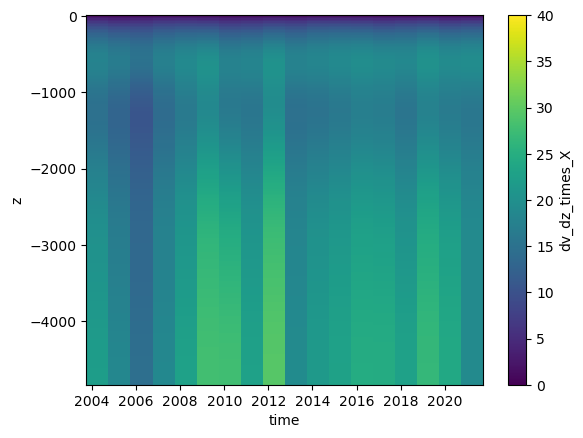

In [152]:
((
    ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
    - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=-4800, method="nearest")
).cumsum("z") * 20.0 / 1e6).resample(time="365D").mean().plot(x="time", y="z", vmin=0, vmax=40)

In [191]:
(
    (-(
        ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
        - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=-4800, method="nearest")
    ).cumsum("z") * 20.0 / 1e6).resample(time="3D").mean().sel(z=slice(None, -1300)).min("z").hvplot(label="own")
    * ds_transp.t_umo10.resample(time="3D").mean().hvplot(label="rapid")
)

:Overlay
   .Curve.Own   :Curve   [time]   (dv_dz_times_X)
   .Curve.Rapid :Curve   [time]   ( upper Mid-Ocean transport)

In [188]:
(
    (-(
        ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
        - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=-4800, method="nearest")
    ).cumsum("z") * 20.0 / 1e6).resample(time="1D").mean().sel(z=slice(None, -1300)).min("z")
    - ds_transp.t_umo10.resample(time="1D").mean()
).rename("diff").to_pandas().describe()

count    6519.000000
mean       -0.559454
std         2.716854
min       -14.455780
25%        -2.264262
50%        -0.492347
75%         1.210935
max         8.458633
dtype: float64

In [173]:
ds_transp = xr.open_dataset("../data/obs/moc_transports_200404_2022215.nc")
ds_transp

<xarray.Dataset> Size: 1MB
Dimensions:       (time: 13057)
Coordinates:
  * time          (time) datetime64[ns] 104kB 2004-04-02 ... 2022-02-15
Data variables:
    t_therm10     (time) float64 104kB ...
    t_aiw10       (time) float64 104kB ...
    t_ud10        (time) float64 104kB ...
    t_ld10        (time) float64 104kB ...
    t_bw10        (time) float64 104kB ...
    t_gs10        (time) float64 104kB ...
    t_ek10        (time) float64 104kB ...
    t_umo10       (time) float64 104kB ...
    moc_mar_hc10  (time) float64 104kB ...
Attributes:
    Title:                         RAPID MOC timeseries
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID-MOC monitoring project is funded...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...

In [ ]:
ts_tr

<Axes: xlabel='z'>

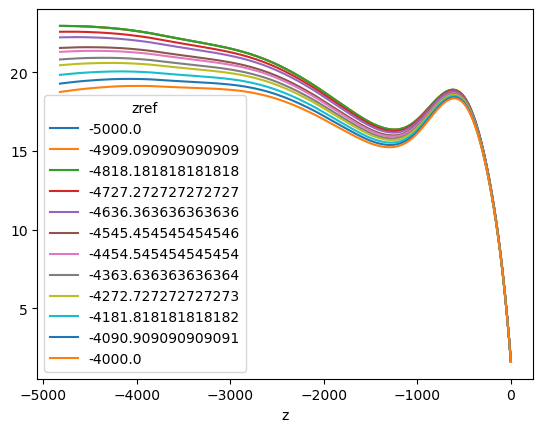

In [143]:
((
    ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).median("time")
    - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).median("time").sel(z=zref, method="nearest")
).cumsum("z") * 20.0 / 1e6).to_pandas().plot()

In [46]:
import hvplot.xarray

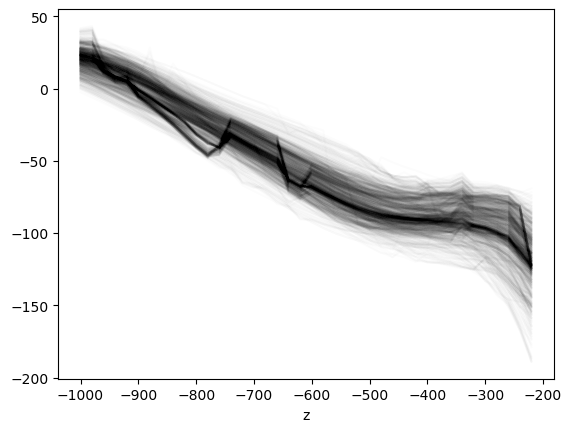

In [75]:
dv_dz.where(
    dv_dz.z.where(~dv_dz.isnull()).max("z") < - 200
).sel(z=slice(-1000, None)).to_pandas().plot(color="k", alpha=0.01, legend=False);

In [77]:
xr.DataArray([0, 1, np.nan]) - xr.DataArray([1, 2, np.nan])

<xarray.DataArray (dim_0: 3)> Size: 24B
array([-1., -1., nan])
Dimensions without coordinates: dim_0

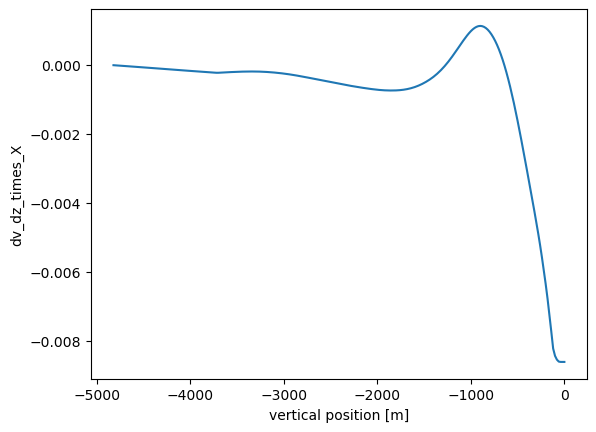

In [43]:
((dv_dz.cumsum("z") * 20.0 / 6_000_000)).mean("time").plot()

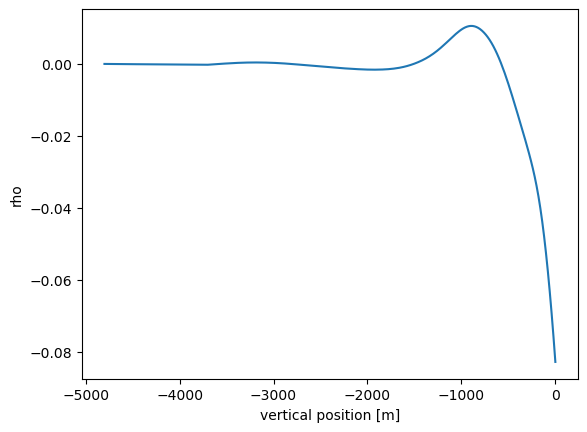

In [15]:
(dv_dz.resample(time="10D").mean().diff("z").ffill("z").cumsum("z").cumsum("z").mean("time") * 20.0 / 1e6).plot()